<a href="https://colab.research.google.com/github/conorreid97/cmp303_project/blob/main/lab10e1_emotion_recognitionMostUpToDate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMP304 AI
# Lab10 exercise 1: Emotion Classification
In this exercise, we are interested in developing a model to distinguish between the universally recognised facial expressions of emotions, joy, anger, sadness, disgust, fear, and surprise. Emotion recognition is core to fields like affective computing, human-computer interaction, and user-centred design. Various areas rely on being able to estimate user feeling to serve applications in health care, security, and entertainment, among others. this could be used in providing better services land customise system response. <br>
Ideally, and emotion recognition model is multi-modal, meaning it works on different information from the user: behavioural (face, pose, speech etc.), psychological (heart rate, breathing) and contextual (environment data, statistics). <br>
For simplicity, we are going to focus on estimating emotions from picture of front facial expressions. A typical input in this case is a standard image and the output is the emotion class. We may also be interested in how confident this decision is, and how accurate the model is in estimating each individual class.
There is a wide range of available datasets that can serve such application. The image used in this exercise is taken from the [MUG](https://mug.ee.auth.gr/fed/) imageset. 

*Aifanti, N., Papachristou, C. and Delopoulos, A., 2010, April. The MUG facial expression database. In 11th International Workshop on Image Analysis for Multimedia Interactive Services WIAMIS 10 (pp.1-4). IEEE.*

**Remember it is important to carefully read the specs of any dataset you obtain to understanding their license agreement and properly cite their source.**




# Features

As humans we naturally observe certain cues on the face to infer an affective state by just looking at someone. A smile, a frown, or raise in eyebrows, are useful indications. We learn to associate these signs with certain emotions. This is exactly what a supervised ML model would do. Facial expressions are typically distinguished by locating salient points on the face, sometimes referred to as landmarks, and making the association between these and a label. The most dominant landmarks are usually around eyes, brows, nose, and mouth.

There are many ways to collect features from facial landmarks. Although The majority of landmark detectors begin by finding a face as a region of interest (ROI), the nature of extracted information varies with the algorithm used to locate them. Some landmark detectors rely on identifying changes in colour, shade, or intensity around the face area and the direction of these changes. Others find landmarks based on edges and corners within the ROI.

Here, we will look at one simple way based on [(Munasinghe, 2018)](https://ieeexplore.ieee.org/document/8466510) that relies on annotating the landmarks as seen in Figure 1. <br>

---

![both.jpg](https://drive.google.com/uc?id=1lGMoheCLXWAsqLIqv9z6WG7aBmbluagJ) <br>
**Figure 1** Facial landmarks and their order from Dlib.

---

To locate these landmarks, we will use [Dlib](http://dlib.net/), a common ML library that contains includes some useful functions to locate faces on an image and compute their landmarks.



In [1]:
import dlib

---


**Note:** it should be straightforward to `import dlib` on Colab. However, if you are using a local Python distribution like Anaconda for example, you may need to install Dlib separately before you are able to use the code in this notebook. The procedure varies depending on the distribution you are using. Here are some links for installing dlib. <br>
http://dlib.net/compile.html <br>
https://anaconda.org/conda-forge/dlib  <br>
https://learnopencv.com/install-opencv-3-and-dlib-on-windows-python-only/


---

Dlib has pre-trained face locater and landmark extractor. The model data is stored in a publicly available file called *shape_predictor_68_face_landmarks.dat*. This file that must be present in your project to be able to use the functions. <br>
**The file is available on MLS for you to download.** You can also get the file from [dlib model](https://github.com/davisking/dlib-models) repo and place it in your project folder. <br>

If you are using Google Colab you can just run the code below *once for a runtime* and the file will be placed in the /content folder.

In [2]:
# get the pre-trained face detection model (need to run only once)
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

--2022-05-06 09:07:27--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  48.4MB/s    in 1.3s    

2022-05-06 09:07:28 (48.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



Once the model data is ready, we are able to define the face detector and landmark shape predictor objects. These will be used to process images and return landmark features.

In [33]:
# prep face detector objects
datFile = "/content/shape_predictor_68_face_landmarks.dat"
face_detector = dlib.get_frontal_face_detector() # locates faces
lm_extractor = dlib.shape_predictor(datFile) # computes landmarks

Let us test this on a sample photo. We will read an image, extract its landmarks, and draw them on the face. The image `test.jpg` is available on MLS. Download it and save it in your project folder before completing the code below.

The returned `landmarks` list contains 68 parts holding coordinates of the points shown on Figure 1. You can access each landmark using `landmarks.part(index)`. Each of these landmark is in the form of a tuple (x,y). <br>
For writing to the .csv file, you can use `writerow(list)` of a data writer to insert an entire row at a time. You may also want to add a header row first with column names.

['surprise', 183, 240, 186, 269, 190, 298, 195, 327, 203, 355, 221, 377, 248, 391, 277, 399, 309, 402, 342, 398, 370, 387, 395, 371, 411, 349, 418, 322, 424, 294, 427, 265, 429, 235, 201, 220, 217, 202, 240, 195, 266, 194, 291, 200, 319, 201, 343, 195, 367, 193, 390, 199, 407, 215, 306, 223, 307, 239, 308, 255, 309, 271, 284, 293, 296, 294, 308, 296, 319, 294, 331, 291, 233, 231, 246, 224, 260, 223, 275, 231, 261, 234, 246, 235, 336, 230, 350, 222, 365, 222, 378, 229, 365, 233, 350, 233, 264, 333, 280, 323, 295, 318, 308, 321, 319, 318, 333, 322, 349, 332, 333, 338, 319, 342, 307, 343, 295, 342, 280, 339, 271, 332, 295, 328, 308, 329, 319, 328, 343, 331, 319, 328, 307, 329, 295, 328]


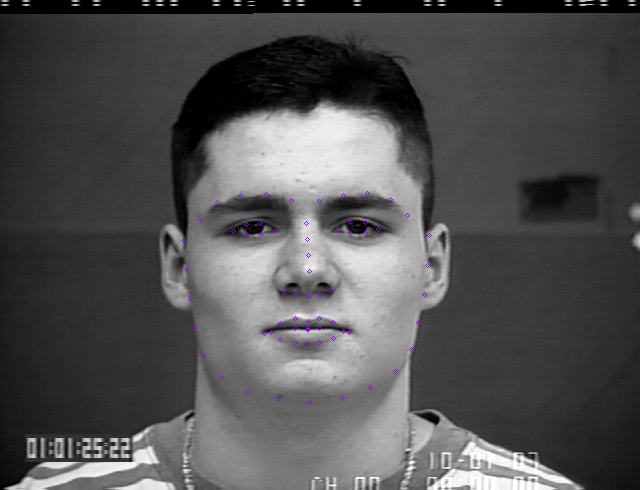

In [44]:
import cv2
import csv
import os
from PIL import Image, ImageOps # the pillow image processing modules we will need
from google.colab.patches import cv2_imshow # for Colab as imshow crashes there
#########################################################
 # function to draw landamrks
def annotate_img(sample, landmarks):
  # TODO(2): for each landmark tuple, unpack its x and y parts
  # use cv.circle to draw a tiny circle in that location on the image
  for i in range(0, landmarks.num_parts):
    x = landmarks.part(i).x
    y = landmarks.part(i).y
    
    center = (x, y)
    radius = 2
    color = (255, 0, 155)
    thickness = 1
    annotated_sample = cv2.circle(sample, center, radius, color, thickness)
  return annotated_sample
#########################################################
file_path = 'test.jpg'
file_dir = 'Neutral_Images/'

files = os.listdir(file_dir)

label = 'surprise' # should change according to emotion in image
#sample = cv2.imread(file_dir) 

for file in files:
    # make sure file is an image
    if file.endswith(('.jpg', '.png', 'jpeg')):
        img_path = file_dir + file
         # load image file
        with Image.open(img_path) as im:
          sample = cv2.imread(img_path) 
            # perform processing
            #im_grayscale = ImageOps.grayscale(im)
            # save result
            #im_grayscale.save(processed_path + file)

# any pre-processing (optional)

# locate face and then landmarks for each face
faces = face_detector(sample) # return a list of faces rectangles if any
for face in faces:
  f_vector = []
  landmarks = lm_extractor(sample, face) # returns object of 68 tuple points (x,y)  
  # TODO(1): loop over the landmark tuples, unpack each to x and y
  # then append them to the feature vector
  for i in range(0, landmarks.num_parts):
    x = landmarks.part(i).x
    y = landmarks.part(i).y
    
    f_vector.append(x)
    f_vector.append(y)
  
  f_vector = [label] + f_vector # append emotion label
  print(f_vector)  
#########################################################
  annotated_sample = annotate_img(sample, landmarks) # to draw landmarks
  cv2_imshow(annotated_sample) # comment out when looping over dataset!
#########################################################
# TODO(3): append the label to the feature vector
# then write it to a .csv file.
filename = 'annotationsFD.csv'

with open(filename, 'w') as csvfile:
    datawriter = csv.writer(csvfile)
    datawriter.writerow(f_vector)
 


If all works fine, for the given `test.jpg` image you should get a `f_vector` in the form: <br>
`['surprise', 231, 453, 234, 511, ...]` <br>

The location values of the landmarks can vary. You can verify your landmarks by drawing them on the image and visually checking they land on the correct points around the face (see Figure 2 below for reference). The important thing is that you use the same feature extraction method for training and testing the model.
![annotated_test.jpg](https://drive.google.com/uc?id=1n_AGxlDVJlb4-p_LFEXpNGrirsgp3gjp) <br>
**Figure 2.** Test image annotated with the 68 dlib landmarks.




## Constructing Dataset of Landmarks
Ideally you should have features from enough data to be able to train a classifier. A partial Cohn-Kanade dataset is given on MLS for you to use in this exercise. Once you download and prep the dataset, modify the code above to loop over all images, extracting their 68 features, and saving them to a file named `all_annotations.csv` along with the labels. <br>
*Cohn-Kanade AU-Coded Facial Expression Database: Kanade, T., Cohn, J.F. and Tian, Y., 2000, March.
Comprehensive database for facial expression analysis. In Proceedings Fourth IEEE International
Conference on Automatic Face and Gesture Recognition (Cat. No. PR00580) (pp. 46-53). IEEE*

---
**Note 1:** you do not need to draw the landmarks on the images. Also remove any imshow calls to avoid too many images getting displayed and slowing down the program.<br>

**Note 2:** the imageset may not be large enough for proper training tasks but it fits the purpose of this exercise. Also remember some datasets may need pre-processg e.g. cleaning, re-naming, etc. (see lecture 3a).

---



# Classification
Now that we have a dataset of features and labels, we will use it to train a model. Support Vector Machines (SVM) are powerful models that can be used for regression and classification tasks. Here, we will train a support vector classifier to learn the extracted landmarks and distinguish the six emotion classes.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
########################################################
# TODO(1): read .csv to a dataframe

data =  # read data into dataframe
########################################################
# TODO(2): separate the features from the labels
y_str =  # get labels column
x =      # get features columns
########################################################
# encode the labels, useful when the model cannot process categorical data
y = preprocessing.LabelEncoder().fit_transform(list(y_str)) # labels as numbers
########################################################
# TODO(3): split tdata and train a model
x_train,x_test,y_train,y_test = 
# create and train a linear model
clf = SVC(kernel='linear', C=10.0)
clf.fit(x, y)
# predict on test data
y_pred = clf.predict(x_test)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
########################################################
# TODO(4): test on new inputs
# load a new image
# extract it features
# predict on the extracted featrures

accuracy: 0.6555555555555556


## Model Parameter
SVC has different parameters depending on the type of kernel. The kernel is the function used to learn the data and fit its distribution. When `kernel='linear'`, a line is used to try and separate the data. You can expect poor accuracy if a linear SVC is trained on non-linearly separable data. If the data is not linearly separable, a more complex model is needed. For example, `kernel='poly'` tries fitting the data with a polynomial with another parameter `degree=value`. The higher the degree the more complex the decision boundary, demanding more resources and execution time. Another powerful model is `kernel=rbf` which uses radial basis functions to fit the data for higher dimensions (when the number of features is large). RBF is controlled with a parameter `gamma=value` which dictates how well the functions fit the data.
One common parameter for all kernels is the `C=value`. This is a regularisation parameter that limits the importance of each data point. <br> 
This [article](https://hands-on.cloud/implementation-of-support-vector-machine-svm-using-python/) provides more details on how SVM works and the meaning of its parameters, margin, and decisions boundries. <br>
Overall, the classifier returns a decision plane (line, curve, or hyperplane, etc.) to separate the data as best as possible with minimum error. Choosing the right parameters can produce stable learning and speed up convergence. It is also important to think about tuning the model in a way that avoid overfitting and underfitting. <br>
**TODO(5):** try different values for the model's parameters in the code above and observe how this impact the accuracy.

## Visualising Decision Boundry
In order to get a better idea of what these values mean, we can try looking at the decision function of SVC and visualise its boundaries. We can only visualise up to 3D so this will not work for the entire feature set. What we can do is work on only two features (or three) and plot the model boundary for those. Here we will use two features. We will also reduce the involved points and work on two classes for better visualisation. **The code below assumes the .csv files has a header row containing the names of the columns and the label column is called “emotion”.** Two functions are provided for plotting the data points and decision plane. <br>
Complete the missing parts for `#TODO(1)` first, run the code, and observe the plots. Then explore different features and parameters. Try choosing feature numbers that you expect should play a role in distinguishing classes (for example landmark #49 and #55 in Figure 1). <br>
**Note that the model is not training on all the classes or features here and should not be used as the final classifier. This task is only for observation purposes.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
########################################################
# function to plot points
def plot_2features(x1, x2, y_str, y):
  # for plotting with custom legend labels
  unique = np.unique(y_str)
  u_code = np.unique(y)
  colors = [plt.cm.jet(i/float(len(unique)-1)) for i in range(len(unique))]
  for i, u in enumerate(u_code):
      xi = [x1[j] for j  in range(len(x)) if y[j] == u]
      yi = [x2[j] for j  in range(len(x)) if y[j] == u]
      plt.scatter(xi, yi, color=colors[u], label=unique[u])
  pl = plt.legend()
  plt.title('Scatter of two features')
########################################################
# function to plot decision plane
def visualisation(x1, x2, data, y_str, y):
  # to visualise decision boundry (from sklearn tutorial)
#https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html  
  # create a mesh to plot in
  h = 1  # step size in the mesh
  x_min, x_max = x1.min() - 1, x1.max() + 1
  y_min, y_max = x2.min() - 1, x2.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
  # classify the mesh points
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Plot also the training points
  #plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
  plot_2features(x1, x2, y_str, y)
  plt.xlabel(data.columns[f1])
  plt.ylabel(data.columns[f2])
  plt.title('SVC decision boundary for two features')
  plt.show()
########################################################
# TODO(1): repeat what you did for the previous code cell
# read data into dataframe

data = 
########################################################
# drop all rows except for two classes
# you can change to view features for any two classes
data = data[(data.emotion == 'surprise')| (data['emotion'] == 'anger')]
########################################################
# separate the features from the labels
y_str = 
x = 
########################################################
y = preprocessing.LabelEncoder().fit_transform(list(y_str)) # labels as numbers
########################################################
# for visualisation, choose any two features
# TODO(2): change which two feature are used and observe graphs
f1 = 1
f2 = 5
x1 = x[:,f1]
x2 = x[:,f2]
x  = np.column_stack((x1, x2))
########################################################
# TODO(3): change model parameters and observe decision function
clf = SVC(kernel='linear', C=10.0)
clf.fit(x, y)  
########################################################
visualisation(x1, x2, data, y_str, y)

## Feature Engineering
It is apparent by now that the mere locations of the landmarks do not make very strong features. In this section, we will try to get more meaningful information from the landmarks. Rather than using all 68 points, we will engineer new values from a subset of them. The normalised distances between key landmarks will be our feature vector. With reference to Figure 2, we are interested in six new values:
1. **Left eyebrow:** this is the **sum of the normalised distances** between the left eyebrow landmarks and the inner point of the left eye. We **first find the distance between landmark #40 and each left eyebrow point to produce 4 non-normalised distances** (blue in Figure 2). Then we **divide** each of the non-normalised distances by the distance between points #40 and point #22 (red in Figure 2) – this normalises the values according to the size of the specific face. Finally, sum all 4 normalised distances to produce just **one** “left eyebrow” feature and sppend it to the feature vector. 
2. **Right eyebrow:** as above, but using the inner point of the right eye #43 and the right eyebrow points. Make sure to normalise the distances by diving by the corresponding right-side distance. 
3. **Left lip:** as above, but the stationary point now is #34 and the distance used for normalisation is between #34 and #52. Use the 3 points on the top left part of the lip to construct your non-normalised distances: i.e. #49, #50, #51. 
4. **Right lip:** as above, but use the 3 points on the top right part of the lip: i.e. #53, #54, #55. 
5. **Lip width:** this is just the distance between #49 and #55 (green in Figure 2) divided by distance between #34 and #52 (for normalisation) 
6. **Lip height:** this is just the distance between #52 and #58 (green in Figure 2) divided by distance between #34 and #52 (for normalisation) <br>

![distance.jpg](https://drive.google.com/uc?id=1KE1JIXH7KGyfUYnay7cdK-ZLethwMn2p) <br>

**Figure 3** Facial landmarks and distances of interest.

---

Before starting on the distances code, try plotting the landmarks on `test.jpg` again, but draw #22, #23, #40, #43, #34, #52, #58, #49 and #55 with a different colour to make sure you know how to target individual landmarks correctly (refer back to Figure 2 for reference).

In [ ]:
import math
#########################################################
def dist(p1, p2): # Euclidean distance 
  x1 = p1.x
  y1 = p1.y
  x2 = p2.x
  y2 = p2.y  
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
#########################################################
#TODO(1): plot landmarks
# plot #22, #23, #40, #43, #34, #52, #58, #49 and #55 with
# a different colour than the rest of the points

#########################################################
# TOD(2): compute the distances as f_vector and write to csv


If all works fine, for the given `test.jpg` image you should get a `f_vector` similar to **(but not necessarly equal to)** the following : <br>
`['surprise', 5.34, 5.05, 5.00, 5.47, 3.10, 1.77]` <br> 
The values may slightly vary.

---


Now repeat the process of extracting feature vectors from all images, saving to .csv file, and training-testing the classifier with different parameters. Compare accuracy and investigate if such features affect the model’s performance (positively or negatively). You can also use the visualisation code to observe the difference in points distribution and decision plane shape.

---



# Investigative Tasks

* Remember that the method presented here is not the only way for face feature extraction and engineering. You can certainly find other ways or even devise your own as long as the features and meaningful for the purpose and strong enough to represent the data essence. This [article](https://www.kaggle.com/code/pathikghugare/feature-extraction-techniques-for-face-expressions/notebook) mentions some different types of face features.

* In addition to Dlib, other approaches exist for landmark extraction. This is one [example](https://docs.opencv.org/4.x/d2/d42/tutorial_face_landmark_detection_in_an_image.html#:~:text=OpenCV%3A%20Face%20landmark%20detection%20in%20an%20image&text=This%20application%20lets%20you%20detect,is%20now%20available%20in%20OpenCV) from OpenCV.

* As mentioned in the lectures, not all ML models require a separate feature extraction step. In this notebook we are using a support vector classifier. You are encouraged to try other supervised classifiers with or without feature extraction and explore how they perform.

* SVM can perform poorly with large variation of magnitude in data. try normalising the extracted feature and see if this improves or worsen the accuracy. Read [here](https://www.baeldung.com/cs/svm-feature-scaling) on why feature scaling may be beneficial. 

* This [tutorial](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) from scikit-learn demonstrates parameter tuning for SVM and how the different combinations of C, Gamma, and kernel type impacts performance.
